# **Bus Delay**

## Load and prepare the data

In [19]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


How many rows and columns does the dataset contain?

In [20]:
df.shape

(2179, 9)

Are any of the columns missing values?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


For simplicity, we only use 1000 records here. If your computer cannot run this tutorial in a short time, please set a smaller number in the following code. For example, 800.

In [22]:
df = df.iloc[:1000]

Remove columns that are no longer needed.

In [23]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

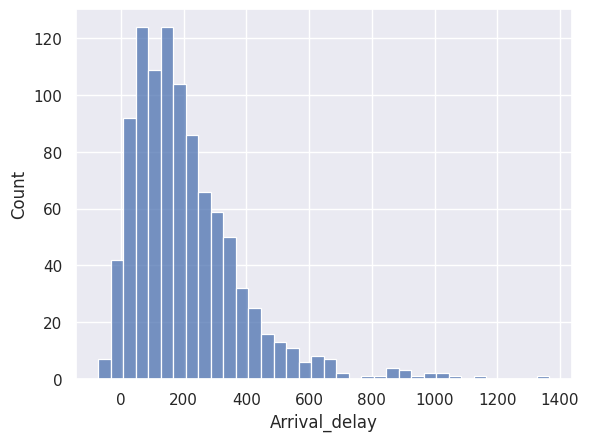

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [25]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993908
Dwell_time,0.222777
Recurrent_delay,0.161830
Scheduled_travel_time,0.117362


Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

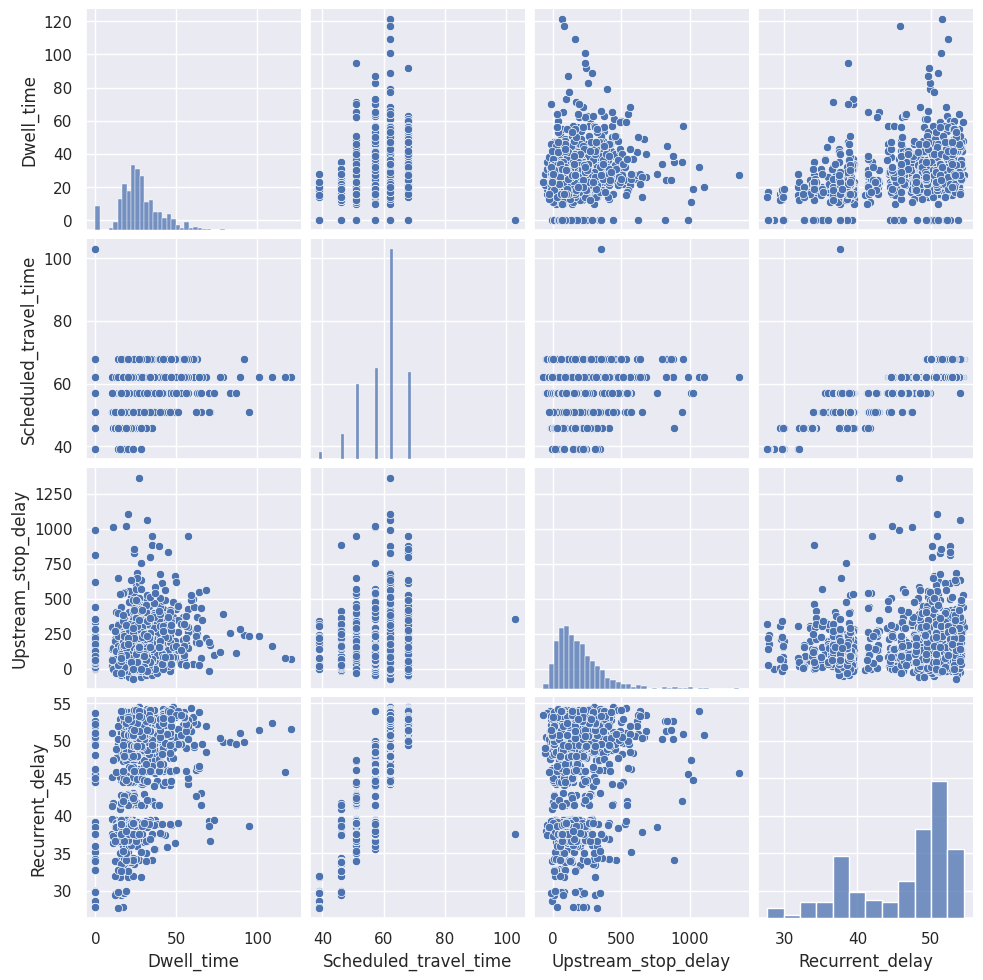

In [26]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

## Train / Test Split


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Linear regression model


In [28]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model.predict(X_test)

### Evaluate the model


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_l = mean_absolute_error(y_test, y_pred)
mse_l = mean_squared_error(y_test, y_pred)
r2_l = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_l}")
print(f"Mean Squared Error: {mse_l}")
print(f"R-squared: {r2_l}")

Mean Absolute Error: 9.12762875155385
Mean Squared Error: 164.53315546398673
R-squared: 0.9933828649167205


### Visualize the Results


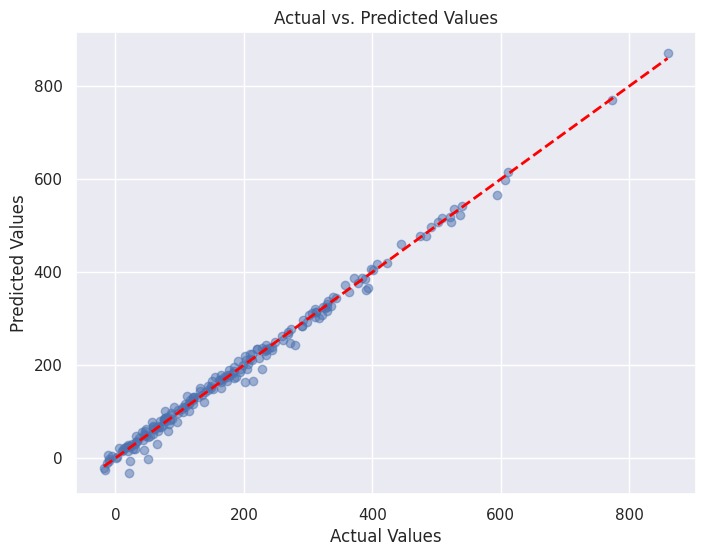

In [30]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

## **SVM**


### Train-test split


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Normalization


In [31]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Grid search


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .....................C=1, epsilon=10, ke

### Train a SVM regression model


In [33]:
# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)


SVR(C=10, epsilon=10, kernel='linear')

### Make predictions


In [34]:
y_pred = best_svr.predict(X_test)
mae_s = mean_absolute_error(y_test, y_pred)
mse_s = mean_squared_error(y_test, y_pred)
r2_s = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae_s}")
print(f"Mean Squared Error: {mse_s}")
print(f"R-squared: {r2_s}")

Mean Absolute Error: 9.029471488864578
Mean Squared Error: 167.1210201664315
R-squared: 0.993278787107813


### Visualize the predictions


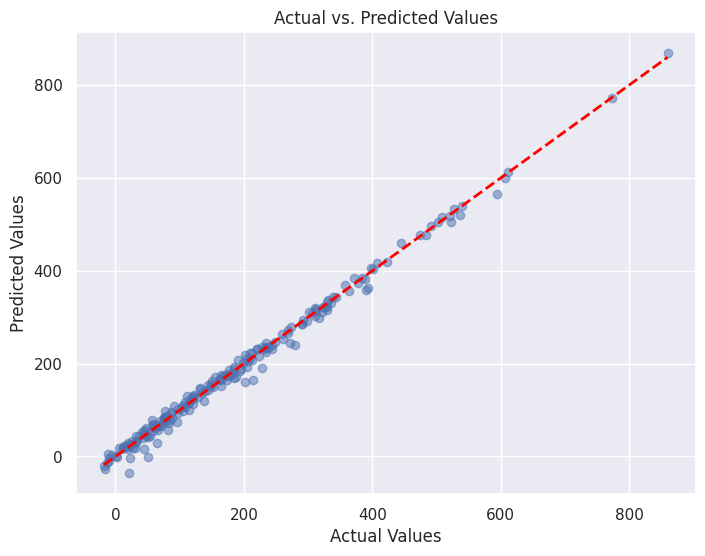

In [35]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

## XGBoosting


### Read file and data

In [12]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)


df = df.iloc[:1000]

df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']


### Split the dataset

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Finetuning

In [7]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    refit=True
)

grid.fit(X_train, y_train)

print("Best parameter:", grid.best_params_)
print("Best score:", grid.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameter: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.9883052229881286


### Create the model and evaluate

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test)

mae_x = mean_absolute_error(y_test, y_pred)
mse_x = mean_squared_error(y_test, y_pred)
r2_x = r2_score(y_test, y_pred)

print("XGBoost result：")
print(f"  MAE  = {mae_x}")
print(f"  MSE  = {mse_x}")
print(f"  R2   = {r2_x}")


XGBoost result：
  MAE  = 10.342438697814941
  MSE  = 197.56369018554688
  R2   = 0.9920544624328613


### Visualize

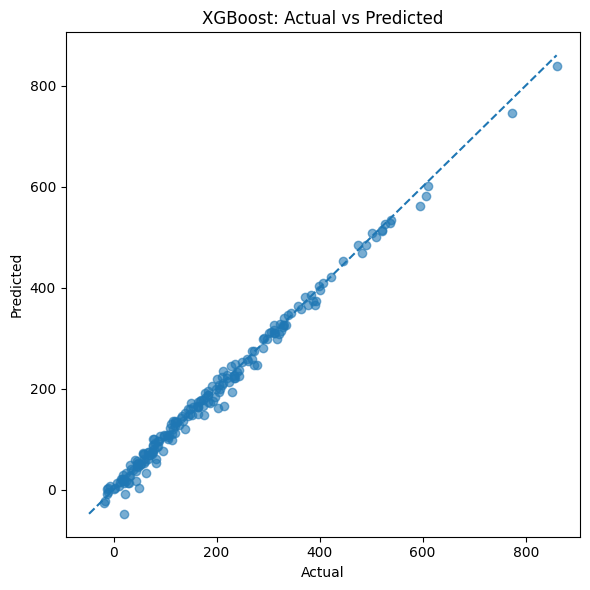

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")
plt.tight_layout()
plt.show()


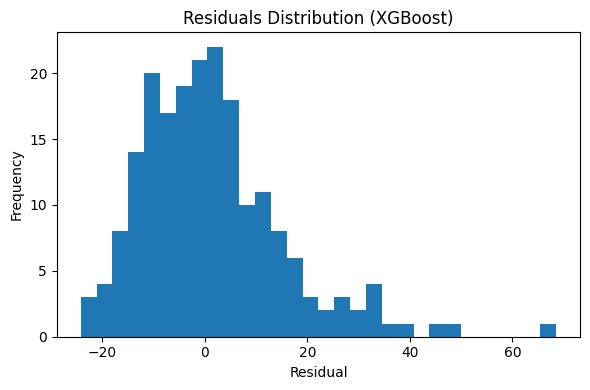

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (XGBoost)")
plt.tight_layout()
plt.show()


### Feature importance

<Figure size 600x600 with 0 Axes>

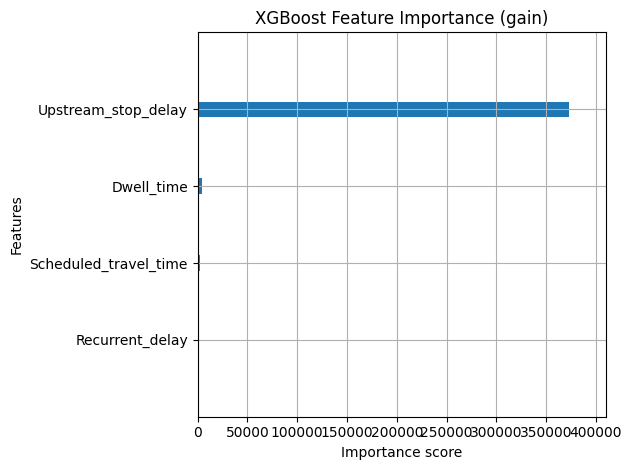

In [18]:
from xgboost import plot_importance
try:
    plt.figure(figsize=(6,6))
    plot_importance(best_xgb, importance_type="gain", show_values=False)
    plt.title("XGBoost Feature Importance (gain)")
    plt.tight_layout()
    plt.show()
except Exception as e:
    # fallback
    fi = best_xgb.feature_importances_
    order = fi.argsort()[::-1]
    names = X_train.columns.values[order]
    vals = fi[order]
    plt.figure(figsize=(8,4))
    plt.bar(range(len(vals)), vals)
    plt.xticks(range(len(vals)), names, rotation=90)
    plt.title("XGBoost Feature Importance (fallback)")
    plt.tight_layout()
    plt.show()

### Compare with Linear model and SVM

In [37]:
results = pd.DataFrame({
    "MAE": [mae_l, mae_s, mae_x],
    "MSE": [mse_l, mse_s, mse_x],
    "R2":  [r2_l, r2_s, r2_x]
}, index=["LinearRegression", "SVM", "XGBoost"])

print("Compare 3 models:")
display(results)


Compare 3 models:


,MAE,MSE,R2
LinearRegression,9.127629,164.533155,0.993383
SVM,9.029471,167.121020,0.993279
XGBoost,10.342439,197.563690,0.992054


# Bike Sharing Demand Prediction

## Linear Model

In [40]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

from sklearn.model_selection import train_test_split
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [41]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_l2 = mean_absolute_error(y_test, y_pred)
mse_l2 = mean_squared_error(y_test, y_pred)
r2_l2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_l2}")
print(f"Mean Squared Error: {mse_l2}")
print(f"R-squared: {r2_l2}")

Mean Absolute Error: 104.79577059911452
Mean Squared Error: 19379.312944744703
R-squared: 0.3879974354720257


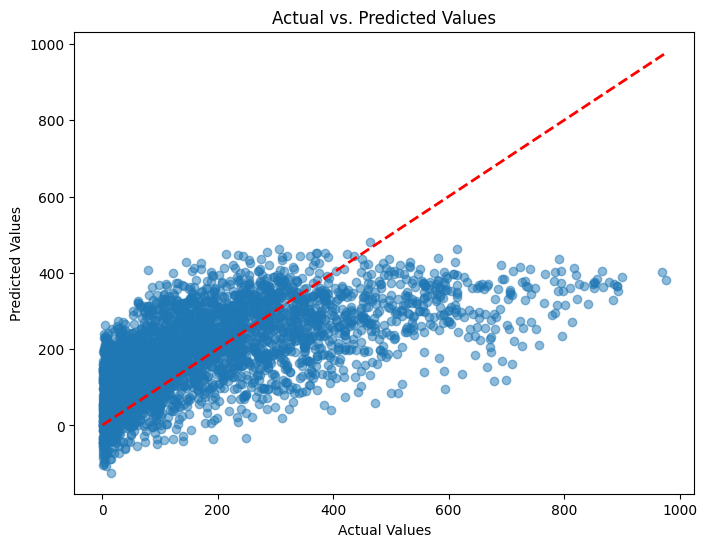

In [43]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

## SVM

### Load data

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BikeSharing.csv')
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Feature engineering
- Target: `cnt` (count of total rental bikes including both casual and registered)
- Predictors: weather (`temp`, `atemp`, `hum`, `windspeed`, `weathersit`), calendar (`hr`, `weekday`, `workingday`, `holiday`, `season`), and `yr`.
- We keep it simple; you can expand features (e.g., interactions) later.

In [3]:
from sklearn.model_selection import train_test_split
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Normalization

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Grid search

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear',  'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   4.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   3.4s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   3.4s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   3.5s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   3.9s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   5.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   5.6s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   5.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   5.6s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   6.3s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   4.7s
[CV] END .....................C=1, epsilon=10, ke

### Train model and make predictions

In [6]:
# Create an SVR model with the best parameters from the grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
best_svr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_svr.predict(X_test)
mae_s2 = mean_absolute_error(y_test, y_pred)
mse_s2 = mean_squared_error(y_test, y_pred)
r2_s2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae_s2}")
print(f"Mean Squared Error: {mse_s2}")
print(f"R-squared: {r2_s2}")


Mean Absolute Error: 79.97929783472864
Mean Squared Error: 16547.571712068584
R-squared: 0.47742438788353314


## XGBoosting

### Load data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'
df = pd.read_csv(url)

df.head(10)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Split the dataset

In [33]:
from sklearn.model_selection import train_test_split
target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Grid search

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    scoring='r2'
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END 

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

In [35]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_xgb = grid_search.best_estimator_
best_xgb


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.8}
Best Score: 0.945850101563121


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluate

In [36]:
y_pred = best_xgb.predict(X_test)

mae_x2 = mean_absolute_error(y_test, y_pred)
mse_x2 = mean_squared_error(y_test, y_pred)
r2_x2 = r2_score(y_test, y_pred)

print("XGBoost Results:")
print("Mean Absolute Error:", mae_x2)
print("Mean Squared Error:", mse_x2)
print("R-squared:", r2_x2)


XGBoost Results:
Mean Absolute Error: 24.178895230214536
Mean Squared Error: 1525.3463183165727
R-squared: 0.9518292593104444


### Visualization

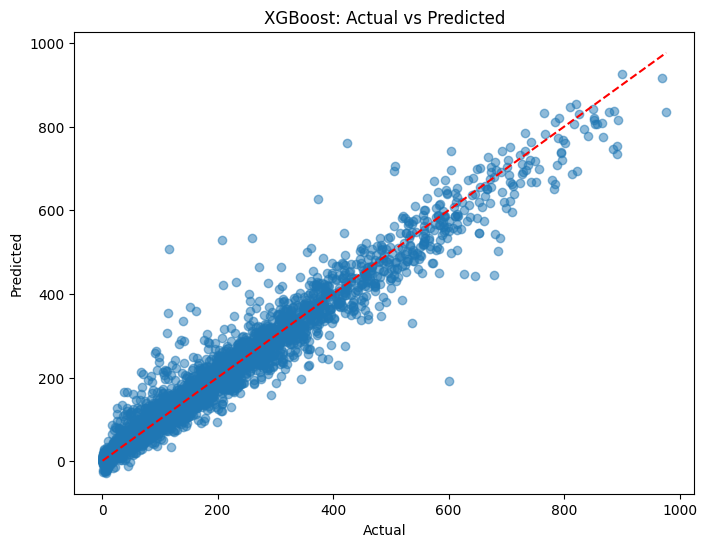

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")
plt.show()


### Feature importance

<Figure size 1000x800 with 0 Axes>

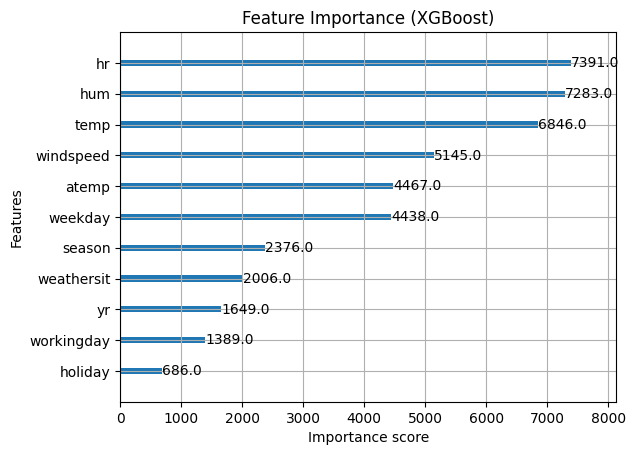

In [38]:
plt.figure(figsize=(10,8))
plot_importance(best_xgb, importance_type="weight", max_num_features=15)
plt.title("Feature Importance (XGBoost)")
plt.show()


## Comparison with SVM

In [46]:
print("Comparison: SVM vs XGBoost")
print("--------------------------")
print("Linear -> MAE:", mae_l2, ", MSE:", mse_l2, ", R2:", r2_l2)
print("SVM    -> MAE:", mae_s2, ", MSE:", mse_s2, ", R2:", r2_s2)
print("XGB    -> MAE:", mae_x2, ", MSE:", mse_x2, ", R2:", r2_x2)


Comparison: SVM vs XGBoost
--------------------------
Linear -> MAE: 104.79577059911452 , MSE: 19379.312944744703 , R2: 0.3879974354720257
SVM    -> MAE: 79.97929783472864 , MSE: 16547.571712068584 , R2: 0.47742438788353314
XGB    -> MAE: 24.178895230214536 , MSE: 1525.3463183165727 , R2: 0.9518292593104444
